# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 4. See the first 10 entries

In [ ]:
##위에서 했음

### Step 5. Create a histogram of the top 5 items bought

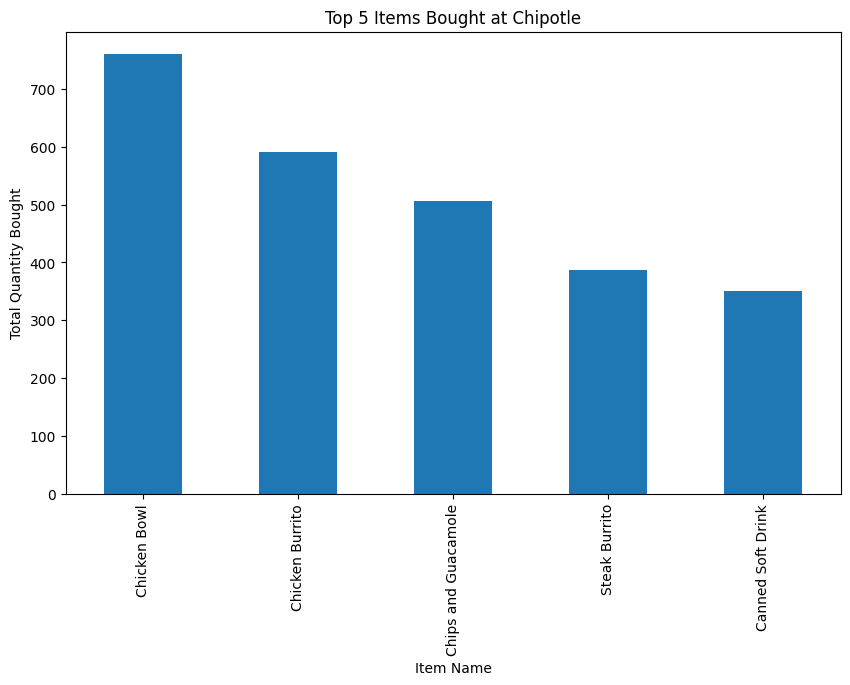

In [4]:
item_counts = chipo.groupby('item_name')['quantity'].sum()
top5items = item_counts.sort_values(ascending=False).head(5)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top5items.plot(kind='bar')
plt.title('Top 5 Items Bought at Chipotle')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Bought')
plt.show()

## We group the dataset by item_name and sum the quantity to get the total number of each item bought.
## Sort the items in descending order to find the top 5.
## Use matplotlib to create a bar chart representing the top 5 items and their total quantities.

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

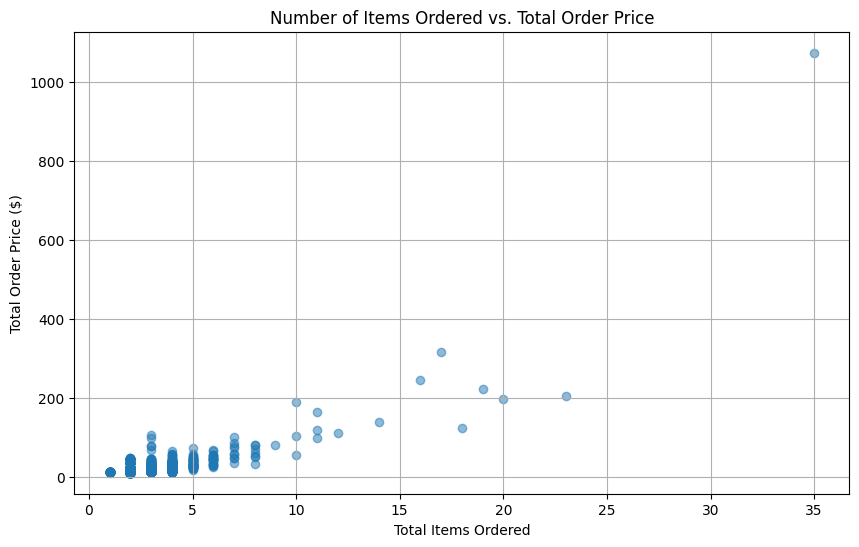

In [5]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
chipo['total_price'] = chipo['quantity'] * chipo['item_price']
order_totals = chipo.groupby('order_id').agg(
    total_items_ordered=('quantity', 'sum'),
    total_order_price=('total_price', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(order_totals['total_items_ordered'], order_totals['total_order_price'], alpha=0.5)
plt.title('Number of Items Ordered vs. Total Order Price')
plt.xlabel('Total Items Ordered')
plt.ylabel('Total Order Price ($)')
plt.grid(True)
plt.show()

##Step 1: str.replace()를 사용하여 item_price 열에서 달러 기호를 제거한 후, 결과 문자열을 astype(float)를 통해 float 타입으로 변환합니다.
##Step 2: quantity와 item_price를 곱하여 각 품목에 대한 총 가격을 계산하고, 결과를 total_price라는 새로운 열에 저장합니다.
##Step 3: order_id로 그룹화하여 각 주문의 총 품목 수(quantity)와 총 가격을 계산합니다.
##Step 4: matplotlib을 사용하여 산점도를 생성하고, 각 주문에 대한 총 주문 품목 수와 총 가격을 플롯팅합니다.

### Step 7. BONUS: Create a question and a graph to answer your own question.